# Symbolisches Rechnen mit Python

M. Sc. Roy Morgenstern

Institut für Geotechnik

TU Bergakademie Freiberg

<!-- ![logo_feme](logo_feme.png) -->
<img src="./images/Logo_FM_neu.png" alt="Logo FEME" width="200">

## Symbolisches Rechnen

* Rechnen mit einem *Computer-Algebra-System (CAS)*
* In Python über das Modul `sympy` realisiert

### Umsetzung in Python

* Modul importieren ```import sympy as sp```
* *sympy* rechnet mit **Symbolen**, diese müssen erzeugt werden: `sp.Symbol` oder `sp.symbols` → Groß- und Kleinschreibung beachten!
* eigene Funktionen anlegen: `sp.Function('f')(x)`
* Differenzieren: `sp.Diff(<<Ausdruck>>, <<Variable>>)`
* Ausdrücke substituieren: `sp.Subs(<<Alt>>, <<Neu>>)` → funktioniert auch mit mehreren Elementen gleichzeitig (höhere Ableitungen zuerst)!
* Matrizen anlegen: `sp.Matrix`
* Integration: `sp.Integrate`
* Grenzwerte bestimmen: `sp.limit`
* stückweise definierte Funktionen: `sp.Piecewise`

* Dokumentation abrufbar unter [https://docs.sympy.org/latest/index.html](https://docs.sympy.org/latest/index.html)

**Symbolische Formeln numerisch Auswerten**

`sp.lambdify` erzeugt eine Python-Funktion, die mit beliebigen Werten aufgerufen werden kann.

Dazu ein Beispiel:

In [10]:
import sympy as sp # sympy-Modul importieren als Alias import

# Symbole anlegen
a, b, x = sp.symbols('a, b, x')

# alternativ:
# a, b, x = sp.symbols(['a', 'b', 'x'])
# oder aber auch
# a = sp.Symbol('a')
# b = sp.Symbol('c')
# x = sp.Symbol('x')

f = a*sp.sin(b*x)  # Funktion f anlegen
df_xa = f.diff(x)  # Funktion f nach x einmal differenzieren

print(f)
print(df_xa)

a*sin(b*x)
a*b*cos(b*x)


In [11]:
# aufrufbare Funktionen generieren
import math # wichtige Mathe-Funktionen --> PI

f_xa_fnc = sp.lambdify((a, b, x), f, modules='numpy')
df_xa_fnc = sp.lambdify((a, b, x), df_xa, modules='numpy')

A = 2.0
F = 10.0 # Hz
B = 2*math.pi*F
X = 0.5*math.pi

print("f(%.2f)  = %.2f" % (X, f_xa_fnc(A, B, X)))
print("f'(%.2f) = %.2f" % (X, df_xa_fnc(A, B, X)))

f(1.57)  = -1.93
f'(1.57) = -32.81


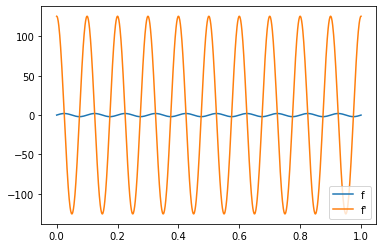

In [16]:
# oder etwas anders mit grafischer Darstellung
from numpy import linspace
from pylab import *  # kein guter Stil, aber dafür reicht es!

xi = linspace(0, 1, 1000)
plot(xi, f_xa_fnc(A, B, xi), label='f')
plot(xi, df_xa_fnc(A, B, xi), label="f'")
legend(loc='lower right')

## Tafelübung `Newton-Verfahren`

Das Newton-Verfahren vom Vortag soll nun auf beliebige Funktionen erweitert werden.

Für das Newton-Verfahren sind folgende Dinge notwendig:

* Funktionsgleichung f
* Ableitung f'
* Startwert x0

Funktionsgleichung


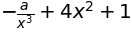

In [19]:
import sympy as sp  # Sympy als Alias-Import
sp.init_printing(use_unicode=True)

# Symbole anlegen
a, x = sp.symbols('a, x')

# Funktionen
fx = 1-a/x**3 + 4*x**2
fx1 = sp.diff(fx, x)

print('Funktionsgleichung')
fx

Ableitung


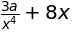

In [20]:
print('Ableitung')
fx1

Funktionsgleichung


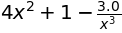

In [21]:
a_val = 3.0  # Wert für den Parameter a

params_dict = {a: a_val}  # dem Symbol a wird der Wert a_val zugeordnet
fx_a = fx.subs(params_dict)
fx1_a = fx1.subs(params_dict)

print('Funktionsgleichung')
fx_a

Ableitung


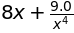

In [22]:
print('Ableitung')
fx1_a

In [44]:
# aufrufbare Funktionen erzeugen
fxfnc = sp.lambdify(x, fx_a, modules='numpy')
fx1fnc = sp.lambdify(x, fx1_a, modules='numpy')

def newton(fx, fx1, x0, fehler=1e-6):
    # fx, fx1 lokale variablen der Funktion newton
    x1 = x0
    x2 = x1 - fx(x1)/fx1(x1) # erste Iteration
    it = 1
    
    conv = []
    conv.append([it, abs(x2-x1)])
    
    while (abs(x2-x1)>=fehler):
        x1 = x2
        x2 = x1 - fx(x1)/fx1(x1) # folgende Iteration
        it += 1
        conv.append([it, abs(x2-x1)])
    return (x2, it, abs(x2-x1), conv)

x1, it1, err1, c1 = newton(fxfnc, fx1fnc, a_val/2, 1e-8)
print('Test 1', x1, it1, err1)

x2, it2, err2, c2 = newton(fxfnc, fx1fnc, a_val*2, 1e-8)
print('Test 2', x2, it2, err2)

# vergleich mit sympy solve
from sympy.solvers import solve
print('Sympy', solve(fx_a)) # auch mit komplexen Lösungen --> sp.Symbol('x', real=True)

Test 1 0.8940798793848858 5 7.632842136118256e-10
Test 2 0.8940798793848858 7 1.6796245505545926e-09
Sympy [0.894079879384886, -0.720025064339369 - 0.583207774024977*I, -0.720025064339369 + 0.583207774024977*I, 0.272985124646926 - 0.950007936405106*I, 0.272985124646926 + 0.950007936405106*I]


Text(0, 0.5, 'y')

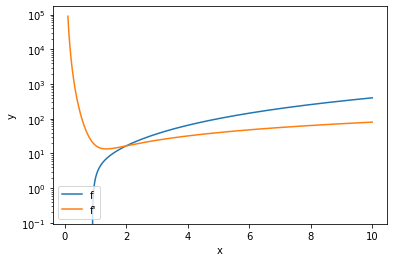

In [45]:
# Funktionen anzeigen
from pylab import *
from numpy import array, linspace

xi = linspace(0.1, 10, 1000)
fi = fxfnc(xi)
f1i = fx1fnc(xi)

semilogy(xi, fi, label='f')
semilogy(xi, f1i, label="f'")
legend(loc='lower left')
xlabel('x')
ylabel('y')

Text(0, 0.5, 'Fehler')

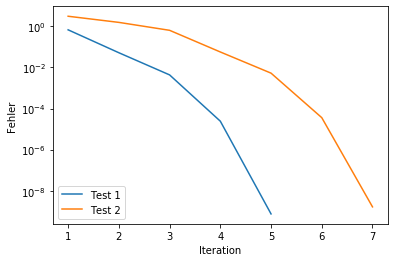

In [46]:
# Konvergenzplots
c1 = array(c1)
c2 = array(c2)
semilogy(c1[:, 0], c1[:, 1], label='Test 1')
semilogy(c2[:, 0], c2[:, 1], label='Test 2')
legend(loc='lower left')
xlabel('Iteration')
ylabel('Fehler')

## Übungsaufgabe

Berechne die Bewegungsgleichung eines mathematischen Pendels mittels des Lagrange-Formalismus. Dabei soll $\Phi$ eine generalisierte Koordinate sein und das Pendel die Masse $m$ und die Länge $l$ besitzen.

**Mathematisches Pendel:**

* Kinetische Energie: $T = \frac{1}{2} m \left( l \cdot \dot{\Phi} \right)^2$
* Potentielle Energie: $U = m g l \left( 1 - \cos \Phi \right)$
* Lagrange-Gleichung: $L = T - U$
* Euler-Lagrange-Gleichung: $\frac{d}{dt}\frac{\partial L}{\partial \dot{\Phi}} - \frac{\partial L}{\partial \Phi} = 0$


### Lösung

1. Symbole für alle benötigten Parameter anlegen
2. Zeitfunktion $\Phi(t)$ anlegen
3. Ableitung $\Phi'(t)$ bilden
4. $T$, $U$ und $L$ berechnen
5. Hilfsterme für die Lagrange-Funktion erzeugen
6. Bewegungsgleichung aufstellen
7. Auflösen der Bewegungslgeichung nach $\Phi(t)$
8. Berechnete Lösung anzeigen und numerische Approximation für $A = 1$ und $\omega = 0.5$ bestimmen

### Hinweise

* Kleinwinkelnäherung: $\sin \Phi \approx \Phi$ für kleine Winkel $\Phi < 10^\circ$
* Anfangsbedingung und Randbedingung: $\Phi(0) = A$ und $\Phi'(0) = 0$

In [53]:
# benötigte Module einbinden
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True)

def lagrange():
    # Symbole anlegen
    m, g, le = sp.symbols('m, g, l', real=True, nonnegative=True, nonzero=True)  # Assumptions
    A = sp.Symbol('A', real=True)
    t = sp.Symbol('t', real=True)
    
    # funktionen anlegen
    phi = sp.Function('phi', real=True)  # gleiche Assumptions wie oben
    phidt = phi(t).diff(t)
    
    Ep = m*g*le*(1-sp.cos(phi(t))) # potentielle Energie
    Ek = 0.5*m*(le*phidt)**2  # kinetische Energie
    
    L = Ek - Ep  # Lagrange-Funktion
    Eq = L.diff(phidt).diff(t) - L.diff(phi(t))  # Euler-Lagrange-Gleichung
    
    print('Lagrange-Funktion')
    sp.pprint(L)
    print('Euler-Lagrange-Gleichung')
    sp.pprint(Eq)
    
    # Kleinwinkelnäherung (Auslenkung < 10°)
    rew = {sp.sin(phi(t)): phi(t)}
    Eq1 = Eq.subs(rew)
    
    print('Kleinwinkelnäherung')
    sp.pprint(Eq1)
    
    sol = sp.dsolve(Eq1, phi(t))  # differential solve nach phi(t)
    
    # Abkürzungen
    om = sp.Symbol('omega', real=True)
    rew = {sp.sqrt(g/le): om}
    allg = sol.subs(rew).simplify()
    
    # Lösung aus dem Equation-Object holen
    phit = allg.rhs  # right-hand-side
    phidt = phit.diff(t)
    
    print('Allgemeine Lösung')
    sp.pprint(phit)
    
    print('Allgemeine Ableitung')
    sp.pprint(phidt)
    
    # Konstanten C1 und C2
    C1, C2 = sp.symbols('C1, C2')
    
    # RB und AB
    # phi(0) = A
    # phi'(0) = 0

    # Auflösung nach C1 und C2
    sc = sp.solve((phit.subs(t, 0) - A, phidt.subs(t, 0)), (C1, C2))
    
    sol = phit.subs(sc)
    print('Spezielle Lösung')
    sp.pprint(sol)
    
    # Funktionsobjekte generieren
    phit_f = sp.lambdify((A, om, t), sol, 'numpy', dummify=False)
    phidt_f = sp.lambdify((A, om, t), sol.diff(t), 'numpy', dummify=False)
    phiddt_f = sp.lambdify((A, om, t), sol.diff(t, 2), 'numpy', dummify=False)
    
    return (phit_f, phidt_f, phiddt_f)

phit_f, phidt_f, phiddt_f = lagrange()
    

Lagrange-Funktion
                                            2
                              2   ⎛d       ⎞ 
-g⋅l⋅m⋅(1 - cos(φ(t))) + 0.5⋅l ⋅m⋅⎜──(φ(t))⎟ 
                                  ⎝dt      ⎠ 
Euler-Lagrange-Gleichung
                             2      
                       2    d       
g⋅l⋅m⋅sin(φ(t)) + 1.0⋅l ⋅m⋅───(φ(t))
                             2      
                           dt       
Kleinwinkelnäherung
                        2      
                  2    d       
g⋅l⋅m⋅φ(t) + 1.0⋅l ⋅m⋅───(φ(t))
                        2      
                      dt       
Allgemeine Lösung
C₁⋅sin(1.0⋅ω⋅t) + C₂⋅cos(1.0⋅ω⋅t)
Allgemeine Ableitung
1.0⋅C₁⋅ω⋅cos(1.0⋅ω⋅t) - 1.0⋅C₂⋅ω⋅sin(1.0⋅ω⋅t)
Spezielle Lösung
A⋅cos(1.0⋅ω⋅t)


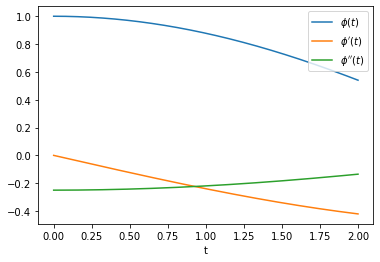

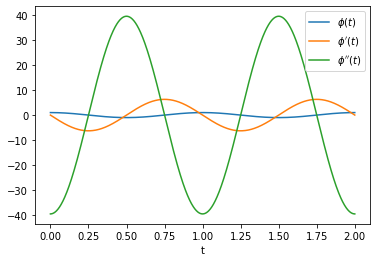

In [58]:
# die Lösung plotten
def plotsim(phitf, phidtf, phiddtf, omega=1.0, A=0.5, tend=2.0):
    fig, ax = plt.subplots(1, 1)
    tvec = np.linspace(0, tend, 1000)
    
    ax.plot(tvec, phitf(A, omega, tvec), label=r'$\phi(t)$')
    ax.plot(tvec, phidtf(A, omega, tvec), label=r"$\phi'(t)$")
    ax.plot(tvec, phiddtf(A, omega, tvec), label=r"$\phi''(t)$")
    ax.legend(loc='upper right')
    ax.set_xlabel('t')

plotsim(phit_f, phidt_f, phiddt_f, omega=0.5, A=1.0)  # omega = 2*pi*f --> f = 0.5/(2*pi) = 0.08 Hz
plotsim(phit_f, phidt_f, phiddt_f, omega=2*np.pi*1, A=1.0)  # f = 1 Hz